<a href="https://colab.research.google.com/github/Afique1/pytorch-basic/blob/main/PytorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 PyTorch Basics

This basic of pytorch is created/learned from [PyTorch Tutorial](https://www.youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4) by Patrick Loeber.

# 02 Installation

In [ ]:
import torch

# 03 Autograd

In [ ]:
torch.cuda.is_available() # changed runtime to T4 GPU "CUDA"

False

In [ ]:
torch.rand(3,2, dtype=torch.float16, device="cuda")

tensor([[0.8325, 0.9014],
        [0.3032, 0.2194],
        [0.3711, 0.9648]], device='cuda:0', dtype=torch.float16)

In [ ]:
torch.manual_seed(42)

x = torch.rand(3,3, requires_grad=True)
y = x + 2

print("x: ", x)
print("\ny: ", y)

z= torch.max(y) # get the max of y
z

x:  tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]], requires_grad=True)

y:  tensor([[2.8823, 2.9150, 2.3829],
        [2.9593, 2.3904, 2.6009],
        [2.2566, 2.7936, 2.9408]], grad_fn=<AddBackward0>)


tensor(2.9593, grad_fn=<MaxBackward1>)

In [ ]:
z.backward() # without backward, grad cant be calculated
x.grad

tensor([[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]])

Lets check how gradient works:

In [ ]:
torch.manual_seed(42)

x = torch.rand(3,3, requires_grad=True)
max= torch.max(x)


print("x: ", x)

print("\nmax value in x: ", max.item())

x:  tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]], requires_grad=True)

max value in x:  0.9593056440353394


In [ ]:
max.backward() # dmax / dx
x.grad

tensor([[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]])

How to stop calculating the gradient?
* x.requires_grad_(False)
* x.detach()
* with torch.no_grad():

In [ ]:
x= torch.rand(3, requires_grad=True)
print("x:", x)

print("\nwithout the required_grad parameter (cannot execute backward) :")

# type I
x.requires_grad_(False)
print("x (with type I):", x)

# type II
y = x.detach()
print("\nx (with type II):", y)

# type III
with torch.no_grad():
  z = x + 2
  print("\nx (with type III):", z)

x: tensor([0.1994, 0.5472, 0.0062], requires_grad=True)

without the required_grad parameter (cannot execute backward) :
x (with type I): tensor([0.1994, 0.5472, 0.0062])

x (with type II): tensor([0.1994, 0.5472, 0.0062])

x (with type III): tensor([2.1994, 2.5472, 2.0062])


`grad_fn` are accumulated one after another if the gradients are not set to after calculating them once. (by using `Torch.grad_zero_()`)

In [ ]:
weights = torch.ones(5, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  # weights.grad.zero_() # without this line the grad will be summed up

tensor([3., 3., 3., 3., 3.])
tensor([6., 6., 6., 6., 6.])
tensor([9., 9., 9., 9., 9.])


pytorch build in optimizer can execute optimization.
**REMEMBER**: to set the grad value to zero `Torch.grad_zero_()`

In [ ]:
# weights = torch.rand(5, requires_grad=True)

# # optimize using Stochastic Gradient Descent (SGD)
# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

# 04 Backpropagation
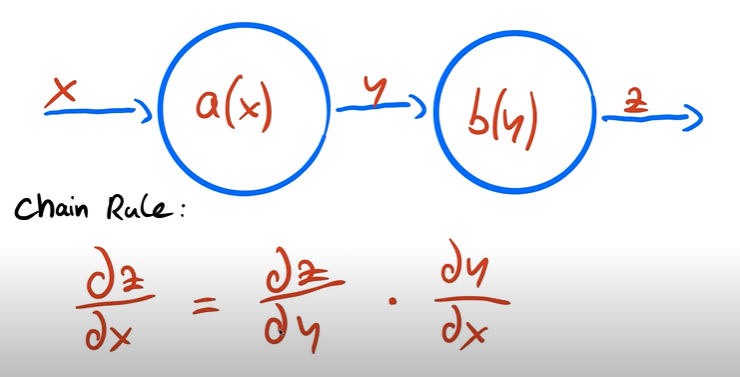

1. forward pass (calculating loss)
2. Computer local grad
3. backward pass (using chain rule)
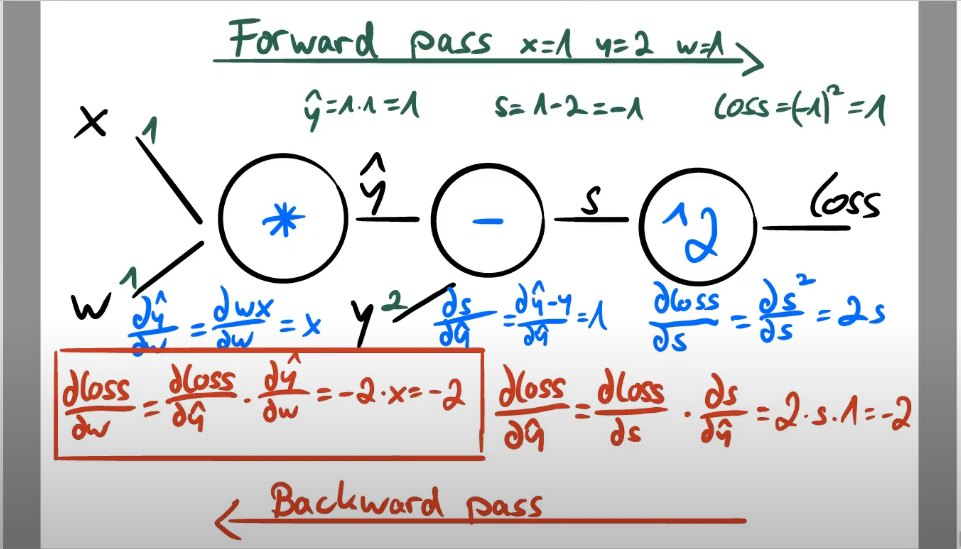

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2

print("loss :",loss.item())

# backward pass
loss.backward()
print("w gradient:",w.grad.item())

# next is to update the weights
# then forward and backward pass for couple of times


loss : 1.0
w gradient: -2.0


# 05 Gradient Descent (from scratch)

* gradient is just the `slope` (m) in y=mx+c.

It is also the `first derivative` of a function. eg: y=f(x), the value of y' is the gradient.
NOTE: for a curved line (x^2+2), the gradient will be the tangent line by solving for the point.

* Gradient Descent: finds the local/global minima for optimizing the loss.


## manual calculation with numpy

Initializing variables

In [ ]:
import numpy as np

# linear combination of weights and inputs (not considering bias "+b")
# f = w * x

# # y = f(x) = 2 * x (for example, w=2)
x = np.array([1, 2, 3, 4], dtype=np.float32) # input
y = np.array([2, 4, 6, 8], dtype=np.float32) # OUTPUT Y label

w=0 # initial weight ( will be updated based on gradient, dw)

In [ ]:

# model prediction: w*x
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()


# gradient on loss
# MSE = (w*x - y)^2 * 1/N  = J
# dJ/dx = 2x(w*x - y) * 1/N [THE CHAIN RULE]
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()


In [ ]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

# traning
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(x)    # prediction = forward pass
    l = loss(y, y_pred)    # loss
    dw = gradient(x, y, y_pred)    # gradients for loss

    # update weight
    w -= learning_rate * dw
    if epoch % 2 == 0: # for every 2 steps
      print(f'epoch {epoch+1}: weight = {w:.3f}, loss = {l:.5f}')
      print(f"Prediction: {y_pred}, Gradient: {dw}")
      print("-"*40)
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 10.000
epoch 1: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 3: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 5: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 7: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 9: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 11: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 13: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
----------------------------------------
epoch 15: weight = 2.000, loss = 0.00000
Prediction: [2. 4. 6. 8.], Gradient:: 0.0
------------

## using PyTorch
Let's do the same thing, but this time using PyTorch instead of numpy

manual forwar and loss but manual backward() (backward for gradient calculation)

In [ ]:
import torch

x = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # input
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # OUTPUT Y label
# y =f(x) = 2*x

# weight will be updated based on gradient
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction: w*x
def forward(x):
  return w * x

# loss = MSE= (w*x - y)^2 * 1/N
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# Torch.tensor.backward()

In [ ]:
print('function: f(x)= w*x')
print(f'Prediction before training: f(5) = {forward(5):.3f}')
print('_'*40)

# traning
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(x)    # prediction = forward pass = w*x
    l = loss(y, y_pred)    # loss = MSE

    # gradients = backward for loss
    l.backward()    #dl/dw

    dw = w.grad.item() # value for the gradient

    # update weight
    with torch.no_grad():
      w -= learning_rate * dw
    # so that gradients do not accumulate
    w.grad.zero_()

    if epoch % 10 == 0: # for every 2 steps
      print(f'epoch {epoch+1}: weight = {w:.3f}, loss = {l:.5f}')
      print(y_pred, dw)
      print("-"*40)
print(f'Prediction after training: f(5) = {forward(5):.3f}')

function: f(x)= w*x
Prediction before training: f(5) = 0.000
________________________________________
epoch 1: weight = 0.300, loss = 30.00000
tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>) -30.0
----------------------------------------
epoch 11: weight = 1.665, loss = 1.16279
tensor([1.6063, 3.2125, 4.8188, 6.4250], grad_fn=<MulBackward0>) -5.90623140335083
----------------------------------------
epoch 21: weight = 1.934, loss = 0.04507
tensor([1.9225, 3.8450, 5.7674, 7.6899], grad_fn=<MulBackward0>) -1.1627840995788574
----------------------------------------
epoch 31: weight = 1.987, loss = 0.00175
tensor([1.9847, 3.9695, 5.9542, 7.9390], grad_fn=<MulBackward0>) -0.2289227843284607
----------------------------------------
epoch 41: weight = 1.997, loss = 0.00007
tensor([1.9970, 3.9940, 5.9910, 7.9880], grad_fn=<MulBackward0>) -0.04506826400756836
----------------------------------------
epoch 51: weight = 1.999, loss = 0.00000
tensor([1.9994, 3.9988, 5.9982, 7.9976], grad_fn=<Mul

# 06 using PyTorch optimizer
instead of manual function defination (for loss  and gradient calculations) , torch methods and optimizer will be used

<hr>
steps for the pipeline:

1. Design Model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training Loop:
  - forward pass (prediction)
  - backward pass (gradients)
  - update weights

In [ ]:
import torch.nn as nn # neural network

# y = f(x) = 2*x
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # input
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # OUTPUT Y label
x_test = torch.tensor([5], dtype=torch.float32) # for testing

n_samples, n_features = x.shape
print(f"Samples: {n_samples}, \nfeatures: {n_features}")

input_dim, output_dim = n_features, n_features

# model = nn.Linear(input_dim, output_dim) # just 1 layer of model

class SimpleModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(SimpleModel, self).__init__()
    # layers:
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return self.lin(x)

model = SimpleModel(input_dim, output_dim)

Samples: 4, 
features: 1


In [ ]:
print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')
print('_'*40)

# traning
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate) # SGD (Stochastic Gradient Descent)

for epoch in range(n_iters):
    y_pred = model(x)       # prediction = forward pass = w*x
    l = loss(y, y_pred)     # loss = MSE
    l.backward()            # dl/dw (gradient of loss based on weight)
    optimizer.step()        # update weight
    optimizer.zero_grad()   # so that gradients do not accumulate


    if epoch % 10 == 0: # for every 10 steps
      [w, b] = model.parameters()
      print(f'epoch {epoch+1}: weight = {w[0][0].item():.3f}, loss = {l:.5f}')
      print("-"*40)
print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')

Prediction before training: f(5) = 3.061
________________________________________
epoch 1: weight = 0.983, loss = 16.65822
----------------------------------------
epoch 11: weight = 1.914, loss = 0.44336
----------------------------------------
epoch 21: weight = 2.062, loss = 0.02312
----------------------------------------
epoch 31: weight = 2.084, loss = 0.01157
----------------------------------------
epoch 41: weight = 2.085, loss = 0.01063
----------------------------------------
epoch 51: weight = 2.083, loss = 0.01001
----------------------------------------
epoch 61: weight = 2.081, loss = 0.00943
----------------------------------------
epoch 71: weight = 2.078, loss = 0.00888
----------------------------------------
epoch 81: weight = 2.076, loss = 0.00836
----------------------------------------
epoch 91: weight = 2.074, loss = 0.00787
----------------------------------------
Prediction after training: f(5) = 10.148


# 07 Linear Regression
steps for the pipeline:

1. Design Model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training Loop:
  - forward pass (prediction)
  - backward pass (gradients)
  - update weights

In [ ]:
import numpy as np # will be used for transformation
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

## Step 0) prepare data

In [ ]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) # reshape the into a column

n_sample, n_features = x.shape
print(f"Samples: {n_sample}, \nfeatures: {n_features}")

Samples: 100, 
features: 1


In [ ]:
x_numpy.shape, y_numpy.shape

((100, 1), (100,))

## Step 1) Model Design

In [ ]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) # single layer

## Step 2) Loss and optimizer

In [ ]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Step 3) Training Loop

In [ ]:
n_iters = 10000
for epoch in range(n_iters):
  y_pred = model(x) # forward pass
  loss = criterion(y_pred, y) # loss
  loss.backward() #gradient
  optimizer.step() #update
  optimizer.zero_grad() # so that gradients do not accumulate

  if epoch % 1000 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: weight = {w[0][0].item():.3f}, loss = {loss:.5f}')

epoch 1: weight = 82.484, loss = 332.56757
epoch 1001: weight = 82.484, loss = 332.56757
epoch 2001: weight = 82.484, loss = 332.56757
epoch 3001: weight = 82.484, loss = 332.56757
epoch 4001: weight = 82.484, loss = 332.56757
epoch 5001: weight = 82.484, loss = 332.56757
epoch 6001: weight = 82.484, loss = 332.56757
epoch 7001: weight = 82.484, loss = 332.56757
epoch 8001: weight = 82.484, loss = 332.56757
epoch 9001: weight = 82.484, loss = 332.56757


Ploting:

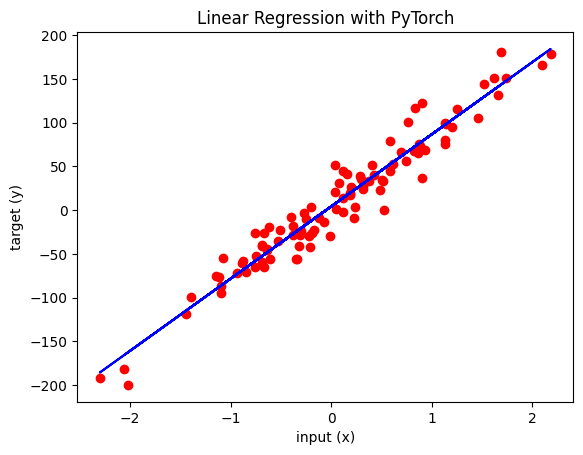

In [ ]:
predicted = model(x).detach().numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.xlabel("input (x)") # Add x-axis label
plt.ylabel("target (y)") # Add y-axis label
plt.title("Linear Regression with PyTorch") # Add a title to the plot
plt.show()

# 08 Logistic Regression

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler # RECOMENDED to scale while performing Logestic Regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## 0) data preparation

In [ ]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(f"Initial\nSamples: {n_samples}, \nfeatures: {n_features}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape
y_train = y_train.view(y_train.shape[0], 1) # each value in only one row as a column vector
y_test = y_test.view(y_test.shape[0], 1)

Initial
Samples: 569, 
features: 30
Final
Samples: 569, 
features: 30


## 1) Model Design
model will be a linear combination of weight and bias:
$$f(x)= w*x+y$$
A sigmoid function will be applied at the end
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e5b42d3fad3c41825a1493a0daa271523cbab01c">

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  def forward(self,X):
    y_pred = torch.sigmoid(self.linear(X))
    return y_pred
model = LogisticRegression(n_features)

## 2) Loss and optimizer

In [ ]:
criterion = nn.BCELoss() # Binary Cross Entropy
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 3) Traning Loop

In [ ]:
num_epoch = 100

for epoch in range(num_epoch):
  y_pred = model(X_train) # forward
  loss = criterion(y_pred, y_train) # loss
  loss.backward() # gradient
  optimizer.step() # update
  optimizer.zero_grad() # so that gradients do not accumulate

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: loss = {loss:.5f}')

epoch 1: loss = 0.88206
epoch 11: loss = 0.64169
epoch 21: loss = 0.51257
epoch 31: loss = 0.43679
epoch 41: loss = 0.38696
epoch 51: loss = 0.35138
epoch 61: loss = 0.32448
epoch 71: loss = 0.30327
epoch 81: loss = 0.28602
epoch 91: loss = 0.27163


## 4) Evaluation

Sigmoid function return values [0,1]

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round() # round up 0.5 as 1 from sigmoid
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy: {acc:.4f}')

accuracy: 0.9211


#  09 - Dataset and DataLoader - Batch Training
* epoch = one forward and backward pass of ALL training samples


* batch_size = (samples in a batch) number of training samples used in one forward/backward pass
* number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of samples
* e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

In [ ]:
# 178 samples, 4 batches (4 samples in a batch)
# number of iteration per epoch?
math.ceil(178/4)

# OUTPUT: 44.5 ; 45 iterations per epoch

45

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''



# --> DataLoader can do the batch computation

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# DEMO: get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print("First sample/row: ",features, labels)

batch_size = 4
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)

# convert to an iterator and look at one random sample from each batch
dataiter = iter(train_loader) #iterates over a batch
data = next(dataiter) # goes to the next batch
features, labels = data # feature and target
print("\none random sample from each batch: ",features, labels)

# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
print(f"\ntotal_samples: {total_samples},\nn_iterations: {n_iterations}")

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):

        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations/steps
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')


First sample/row:  tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

one random sample from each batch:  tensor([[1.1760e+01, 2.6800e+00, 2.9200e+00, 2.0000e+01, 1.0300e+02, 1.7500e+00,
         2.0300e+00, 6.0000e-01, 1.0500e+00, 3.8000e+00, 1.2300e+00, 2.5000e+00,
         6.0700e+02],
        [1.1960e+01, 1.0900e+00, 2.3000e+00, 2.1000e+01, 1.0100e+02, 3.3800e+00,
         2.1400e+00, 1.3000e-01, 1.6500e+00, 3.2100e+00, 9.9000e-01, 3.1300e+00,
         8.8600e+02],
        [1.3320e+01, 3.2400e+00, 2.3800e+00, 2.1500e+01, 9.2000e+01, 1.9300e+00,
         7.6000e-01, 4.5000e-01, 1.2500e+00, 8.4200e+00, 5.5000e-01, 1.6200e+00,
         6.5000e+02],
        [1.4060e+01, 1.6300e+00, 2.2800e+00, 1.6000e+01, 1.2600e+02, 3.0000e+00,
         3.1700e+00, 2.4000e-01, 2.1000e+00, 5.6500e+00, 1.0900e+00, 3.7100e+00,
         7.8000e+02]]) tensor([[2.],

In [ ]:
dataset[0] # the first row/sample of the dataset

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
dataset[177][0] # 178th row of the features, other than the target

tensor([ 14.1300,   4.1000,   2.7400,  24.5000,  96.0000,   2.0500,   0.7600,
          0.5600,   1.3500,   9.2000,   0.6100,   1.6000, 560.0000])

some famous datasets are available in torchvision.datasets

In [ ]:

# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=3,
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

#10) Dataset Transform
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms:
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda

Custom
------
Write own class

Compose multiple Transforms (as a list)
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# 11) Softmax and cross entropy
**Softmax**: applies exponential to each of the elements and then divides them by sum of the all the exponential elements;
$$ S(y_i) = \frac{e^{y_i}}{\sum_j e^{y_j}} $$
It normalizes the output, that being said all the classification falls under zero to one. [the probability of the outputs, the class with the highest probability will be the predicted output] NOte that sum of all the probability will be one(1).


In [ ]:
# sum of all probability is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)


**Cross-Entropy:** Represents the cross-entropy loss between the true labels $(Y)$ and the predicted probabilities $(\hat{Y})$

$$ D(\hat{Y}, Y) = - \frac{1}{N} \sum Y_i \cdot \log(\hat{Y}_i) $$


$D(\hat{Y}, Y)$: Used for multiclass classification

$\hat{Y}$: The predicted probability distribution (often the output of a Softmax activation function).

$Y$: The true probability distribution (often a one-hot encoded vector where the true class has a probability of 1 and others are 0).

$N$: The number of samples (or classes, depending on context, but usually samples in batch training).

$\sum$: Summation over all relevant elements (e.g., classes for a single sample, or samples in a batch).

$Y_i$: The true probability for class $i$.

$\log(\hat{Y}_i)$: The natural logarithm of the predicted probability for class $i$.

$-\frac{1}{N}$: The negative average, used to make the loss positive and to average it across samples (if $N$ represents the batch size). The negative sign is crucial because $\log(\hat{Y}_i)$ will be negative (since $\hat{Y}_i$ is between 0 and 1), and we want a positive loss.

In [ ]:

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model
# whose output is a probability value between 0 and 1.
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y = np.array([1, 0, 0]) # actual prediction
Y_pred_good = np.array([0.7, 0.2, 0.1]) # dummy correct prediction
Y_pred_bad = np.array([0.1, 0.3, 0.6]) # dummy incorrect prediction

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


CrossEntropyLoss in PyTorch: so DO NOT APLLY SOFTMAX IN THE LAST LAYER. because it already applies Softmax,

$$ nn.CrossEntropyLoss= nn.LogSoftmax + nn.NLLLoss$$
NLLLoss: negative log likelihood loss

* Y (=target) contains class labels, **should not be one-hot encoded**
* not to apply softmax while using cross-entropy


In [ ]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()
# loss(predicted, actual)

Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # max is 2.0 : class0
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) # max is 2.0 : class1
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')


PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [ ]:
# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1], # predicted class 0
    [0.1, 0.3, 1.5], # predicted class 2
    [1.2, 0.2, 0.5]]) # predicted class 0

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


## binary classification (with softmax)

In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # layer 1
        self.relu = nn.ReLU()   # activation function
        self.linear2 = nn.Linear(hidden_size, 1)  # layer 2

    # layer1 -> relu -> layer2 -> sigmoid [for binary classification]
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

## Multi-class classification (with-out softmax)
as cross-entropy will be used.

In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    # layer1 -> relu -> layer2 [for multi-class classification]
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (cross-entropy applies Softmax)

# 12) Activation Function
Applies linear transformation to the linear output. Decides if a neuron should be activated or not.

if all the layers are linear then its just a regression task. However, real world problems are more complex. SO, to make the linear layer's output non-linear to another layer's input - activation functions are used.


In [ ]:
# output = w*x + b [multiply weight with input then add bias]
# output = activation_function(output)

x = torch.tensor([-1.0, 1.0, 2.0, 3.0]) # input
print("Input: ",x)

# softmax [Binary step function]: OUTPUTs [0, 1]
# : when input is greater or equal to 0 - outputs1; otherwise outputs
print("\nSoftmax Activation: (Predictics classification)")
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid : OUTPUTs [0,1]
print("\nsigmoid Activation:")
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#Hyperbolic tangent function: OUTPUTS [-1,+1]
print("\ntanh Activation:")
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu: OUTPUTs max(0,x)
print("\nReLU Activation:")
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu: used where gradient vanishes, just to tweak a lil bit for negative numbers- multiplies something (instead of giving zero)
print("\nLeaky ReLU Activation: (used when weights do not update)")
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

Input:  tensor([-1.,  1.,  2.,  3.])

Softmax Activation:
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])

sigmoid Activation:
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])

tanh Activation:
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])

ReLU Activation:
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])

Leaky ReLU Activation:
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


## Ploting of the activation functions

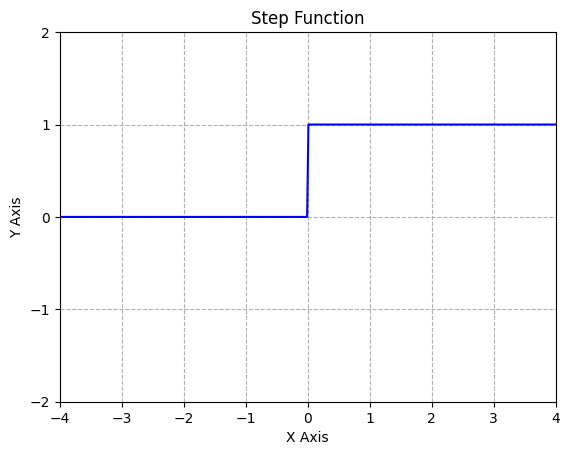

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)

fig = plt.figure()
plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

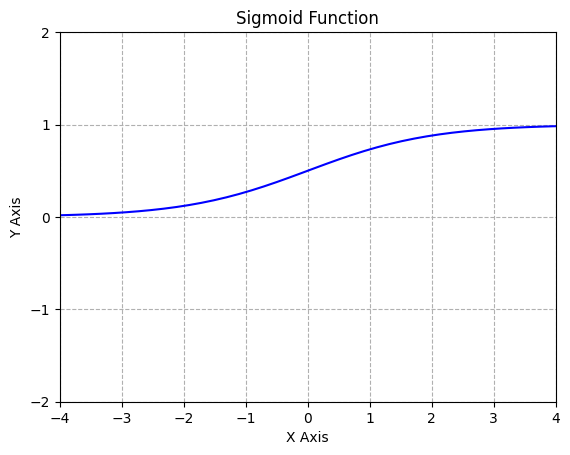

In [ ]:
##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

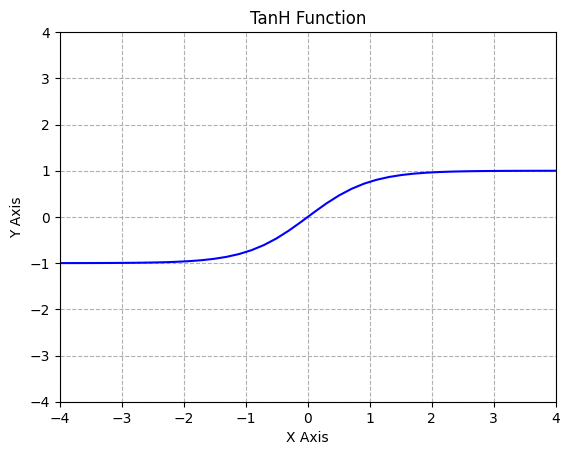

In [ ]:
##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')


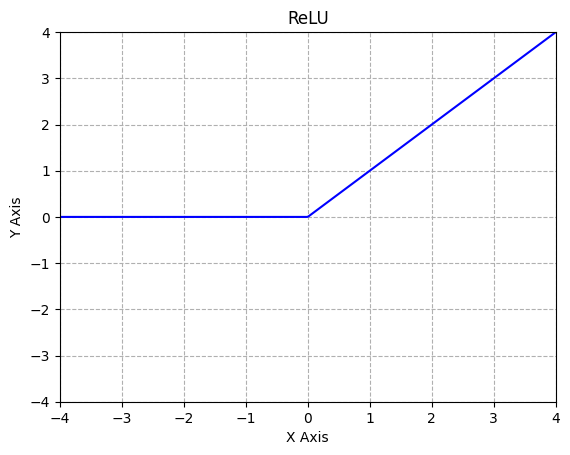

In [ ]:
##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

fig = plt.figure()
plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

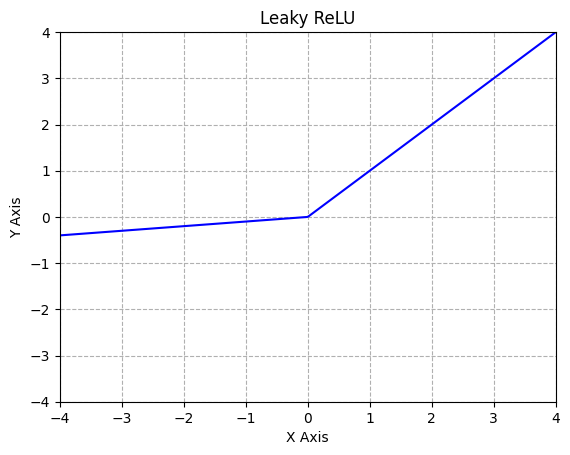

In [ ]:
##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)

fig = plt.figure()
plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

## Two ways to use these activation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model. [option1]

# torch.relu on the other side is just the functional API call to the relu function, [option2]
# so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

# 13) Feed-Forward Neural Network [MNIST dataset : digit classification 0-9]

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28 pixels
hidden_size = 500 # number of neurons in the hidden layer
num_classes = 10 # 10 targets [0-9]
num_epochs = 2 # number of iteration over all the samples
batch_size = 100 # 100 samples in a batch
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),  # transformed into tensor
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor()) # transformed into tensor

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True) # shuffle True for TRAIN

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False) # shuffle Faslse for Test

# to view the images
# examples = iter(test_loader)
# example_data, example_targets = next(examples)

# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(example_data[i][0], cmap='gray')
#     # plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) # input, output (hidden layer)
        self.relu = nn.ReLU()                         # Activation function
        self.l2 = nn.Linear(hidden_size, num_classes)  # hidden layer, targets

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out) # activation function on output of layer one
        out = self.l2(out)   # output of activation func goes into this layer
        # no activation and no softmax at the end because cross-entropy will be used
        return out        # final output layer

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    images = images.reshape(-1, 28*28).to(device) # to flatten the image into 1 dimention (it'll connvert 28*28 (2dim) into 1dim of 784) -1 is used
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      outputs = model(images)
      # max returns (value ,index)
      _, predicted = torch.max(outputs.data, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.12MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.83MB/s]


Epoch [1/2], Step [100/600], Loss: 0.3222
Epoch [1/2], Step [200/600], Loss: 0.1531
Epoch [1/2], Step [300/600], Loss: 0.1636
Epoch [1/2], Step [400/600], Loss: 0.0910
Epoch [1/2], Step [500/600], Loss: 0.0844
Epoch [1/2], Step [600/600], Loss: 0.1503
Epoch [2/2], Step [100/600], Loss: 0.1196
Epoch [2/2], Step [200/600], Loss: 0.2023
Epoch [2/2], Step [300/600], Loss: 0.1904
Epoch [2/2], Step [400/600], Loss: 0.1108
Epoch [2/2], Step [500/600], Loss: 0.0985
Epoch [2/2], Step [600/600], Loss: 0.0990
Accuracy of the network on the 10000 test images: 97.05 %


# 14) Convolutional Neural Network

100%|██████████| 170M/170M [00:11<00:00, 15.2MB/s]


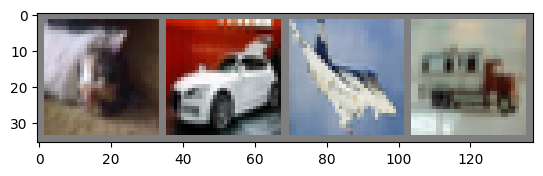

Epoch [1/5], Step [2000/12500], Loss: 2.3263
Epoch [1/5], Step [4000/12500], Loss: 2.2912
Epoch [1/5], Step [6000/12500], Loss: 2.3104
Epoch [1/5], Step [8000/12500], Loss: 2.2663
Epoch [1/5], Step [10000/12500], Loss: 2.1631
Epoch [1/5], Step [12000/12500], Loss: 2.0836
Epoch [2/5], Step [2000/12500], Loss: 2.3773
Epoch [2/5], Step [4000/12500], Loss: 1.9446
Epoch [2/5], Step [6000/12500], Loss: 1.5547
Epoch [2/5], Step [8000/12500], Loss: 2.5021
Epoch [2/5], Step [10000/12500], Loss: 1.8694
Epoch [2/5], Step [12000/12500], Loss: 1.8243
Epoch [3/5], Step [2000/12500], Loss: 1.8820
Epoch [3/5], Step [4000/12500], Loss: 1.6607
Epoch [3/5], Step [6000/12500], Loss: 1.7693
Epoch [3/5], Step [8000/12500], Loss: 1.3425
Epoch [3/5], Step [10000/12500], Loss: 1.9241
Epoch [3/5], Step [12000/12500], Loss: 0.8399
Epoch [4/5], Step [2000/12500], Loss: 1.6481
Epoch [4/5], Step [4000/12500], Loss: 0.9996
Epoch [4/5], Step [6000/12500], Loss: 1.2780
Epoch [4/5], Step [8000/12500], Loss: 1.5908
Epoc

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                          # mean                  std
                          # 0.5                     0.5 -> RGB

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  # img / 2: This changes the range from [-1, 1] to [-0.5, 0.5].
  # + 0.5: This shifts the range from [-0.5, 0.5] to [0, 1].
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()


        # nn.Conv2d(input channenls: 3 (RGB),
                  # output channels (number of filters): the o/p, later will be input of the next channel
                                  # 6 means the layer will learn 6 different filters to apply to the input.
                                  # out_chan = kernel_size x kernel_size x in_channels

                  # kernel/filter size: refers to the dimensions of the filter or kernel that slides over the input data.
                                  # during the convolution operation. This filter is essentially a small matrix of
                                  #  learnable weights that detects specific features within the input, such as
                                  #   edges, textures, or patterns.

        self.conv1 = nn.Conv2d(3, 6, 5) # the
        self.pool = nn.MaxPool2d(2, 2) # max pooling into 2x2 grid
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)   # activation while forward passing
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)] # [0,9]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


# 15) Transfer Learning
a method develops a model for the 1st task, then reuses the same model for the next tasks.

For example, the first model can used to classify cats, dogs. Then the same model can be extented to classify bees and ants (this will happen after modifying a lil bit on the last layer to classify different classes).

By this rapid generation of new models can be achieved/.

In [ ]:
%%capture

!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip
!mkdir data
!mv hymenoptera_data data/

In [ ]:
# imagefolder: saved as folder for the different classes
# scheduler - change of learning rate
# transfer learning

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler # changing the learning rate with gamma
import numpy as np
import torchvision
from torchvision import datasets, models, transforms # pretrained model: resnet18
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), # dataset setting from path to ImageFolder
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)



['ants', 'bees']


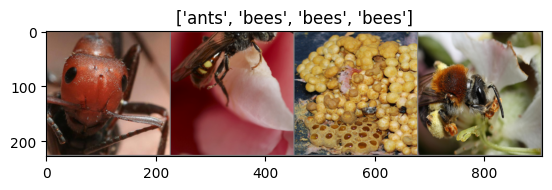

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [ ]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model



In [ ]:
#### Finetuning the convnet ####

model = models.resnet18(pretrained=True)# Load a pretrained model - resnet18

num_ftrs = model.fc.in_features #number of input features from the last layer

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2) # a fully connected layer: feature from the previous model/resnet18
                                  # 2 classes as output bees, ants

model = model.to(device) # gpu / cpu

criterion = nn.CrossEntropyLoss() # for calculating loss

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
        # for epoch in range(100):
        #     train(...)
        #     validate(...)
        #     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer,
                                        step_size=7,
                                        gamma=0.1) # gamma=0.1: every 7 epoch(step_size) learning rate is decreased by 10%

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 118MB/s]


Epoch 0/24
----------
train Loss: 0.6825 Acc: 0.5779
val Loss: 0.5451 Acc: 0.7778

Epoch 1/24
----------
train Loss: 0.5779 Acc: 0.7295
val Loss: 0.3647 Acc: 0.8824

Epoch 2/24
----------
train Loss: 0.5441 Acc: 0.7213
val Loss: 0.3384 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.4450 Acc: 0.8402
val Loss: 0.3020 Acc: 0.9020

Epoch 4/24
----------
train Loss: 0.4406 Acc: 0.7869
val Loss: 0.2526 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.4067 Acc: 0.7992
val Loss: 0.2338 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3790 Acc: 0.8156
val Loss: 0.2103 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3980 Acc: 0.8197
val Loss: 0.2144 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3523 Acc: 0.8443
val Loss: 0.2218 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.4037 Acc: 0.8156
val Loss: 0.2160 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3960 Acc: 0.8197
val Loss: 0.2121 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.3544 Acc: 0.8361
val Loss: 0.2032 Acc: 0.9477

Ep

In [ ]:
#### ConvNet as fixed feature extractor ####

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False # no gradient calculation

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

# 16) TENSORBOARD

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit() # will exit even before going to the following lines of code
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################